In [65]:
import numpy as np

np.random.seed(0)

n_total = 1000 # число образов выборки
n_features = 200 # число признаков

table = np.zeros(shape=(n_total, n_features))

for _ in range(100):
    i, j = np.random.randint(0, n_total), np.random.randint(0, n_features)
    table[i, j] = np.random.randint(1, 10)
F = table.T @ table / table.shape[0]
L, W = np.linalg.eig(F)
WW = sorted(zip(L, W), key=lambda lx: lx[0], reverse=1)
WW = np.array([w[1] for w in WW])

# WW.shape, table.shape  #((200, 200), (1000, 200))
data_x = table @ WW.T  # data_x.shape # (1000, 200)
data_x = data_x[:, :len([x for x in L if x >= 0.01])]  # data_x.shape  # (1000, 52)



(1000, 52)

In [17]:
x = np.array([x for x in range(1, 10)])
x.mean()

np.float64(5.0)

In [25]:
import numpy as np


# экспоненциальная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.exp(-M)


# производная экспоненциальной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -np.exp(-M) * x.T * y


data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01])  # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 500  # число итераций алгоритма SGD
batch_size = 10 # размер мини-батча (величина K = 10)

Qe = np.mean([np.dot(w, x) * y for x, y in zip(x_train, y_train)])# начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

# здесь продолжайте программу
for i in range(N):
    k = np.random.randint(0, n_train - batch_size - 1)
    Qe = lm * np.mean([loss(w, x, y) for x, y in zip(x_train[k:k+batch_size], y_train[k:k+batch_size])]) + (1-lm) * Qe
    w -= nt * np.mean([df(w, x, y) for x, y in zip(x_train[k:k+batch_size], y_train[k:k+batch_size])], axis=0)

Q = np.mean([np.dot(w, x) * y < 0 for x, y in zip(x_train, y_train)])
w, Q

(array([-3.99368023,  0.34850649,  1.07879392]), np.float64(0.07))

0.4606385324397492
-1.0584606287562468


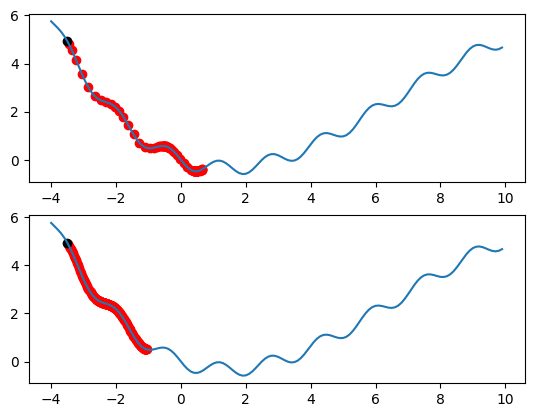

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return -0.5 * x + 0.2 * x ** 2 - 0.01 * x ** 3 - 0.3 * np.sin(4*x)

def df(x):
    return -0.5 + 0.4 * x - 0.03 * x ** 2 - 1.2 * np.cos(4*x)
nt = 0.1
x0 = -3.5
x = x0
gm = 0.8
N = 200
v = 0

xplot = []
for i in range(N):
    v = gm * v + (1 - gm) * nt * df(x)
    x -= v
    xplot.append(x)

print(x)
X = np.arange(-4, 10, 0.1)
Y = func(X)
fig, axes = plt.subplots(2, 1)
axes[0].plot(X, Y)
axes[0].scatter(xplot, func(np.array(xplot)), c='r')
axes[0].scatter(x0, func(x0), c='black')
xplot = []
x = x0
for i in range(N):
    x -= lm * df(x)
    xplot.append(x)

axes[1].plot(X, Y)
axes[1].scatter(xplot, func(np.array(xplot)), c='r')
axes[1].scatter(x0, func(x0), c='black')
print(x)